# Проект - Определение перспективного тарифа для телеком-компании

## Описание

**Данные- данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год.**

**Цель -   Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.**

### Информация о тарифах

* Тариф «Смарт»
 - Ежемесячная плата: 550 рублей
 - Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
 - Стоимость услуг сверх тарифного пакета:
 - минута разговора: 3 рубля
 - сообщение: 3 рубля
 - 1 Гб интернет-трафика: 200 рублей
 

* Тариф «Ультра»
 - Ежемесячная плата: 1950 рублей
 - Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
 - Стоимость услуг сверх тарифного пакета:
 - минута разговора: 1 рубль
 - сообщение: 1 рубль
 - 1 Гб интернет-трафика: 150 рублей

## Ход исследования:

* 1. Открыть файлы и изучить информацию


* 2. Предобработка:
  * Привести данные к нужным типам
  * Найти и исправить ошибки в данных, если они есть
 
 
* 3. Добавление новых столбцов:
  * Посчитать для каждого пользователя:
    * 1 количество сделанных звонков и израсходованных минут разговора по месяцам;
    * 2 количество отправленных сообщений по месяцам;
    * 3 объем израсходованного интернет-трафика по месяцам;
    * 4 помесячную выручку с каждого пользователя
    
    
* 4. Анализ данных:
   * Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц
   * Посчитать среднее количество, дисперсию и стандартное отклонение.
   * Построить гистрограммы
   * Описать распределения
   
   
* 5. Проверка Гипотез:
  * Гипотеза 1: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
  * Гипотеза 2: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.
  
  
* 6. Общий Вывод.

## Изучение Файла

In [1]:
import pandas as pd

import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt

import numpy as np
import scipy.stats as st

In [2]:
try:
    cal = pd.read_csv('/datasets/calls.csv')
    intr = pd.read_csv('/datasets/internet.csv')
    mes = pd.read_csv('/datasets/messages.csv')
    tar = pd.read_csv('/datasets/tariffs.csv')
    us = pd.read_csv('/datasets/users.csv')
    
except:
    cal = pd.read_csv('calls.csv')
    intr = pd.read_csv('internet.csv')
    mes = pd.read_csv('messages.csv')
    tar = pd.read_csv('tariffs.csv')
    us = pd.read_csv('users.csv')

Проведу обзор всех датасетов.

In [3]:
for df in [cal, intr, mes, us, tar]: 
    print(df.info(), end='\n\n')
    print(df.describe())
    print('Количество дубликатов', df.duplicated().sum())
    print('______')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None

            duration        user_id
count  202607.000000  202607.000000
mean        6.755887    1253.940619
std         5.843365     144.722751
min         0.000000    1000.000000
25%         1.300000    1126.000000
50%         6.000000    1260.000000
75%        10.700000    1379.000000
max        38.000000    1499.000000
Количество дубликатов 0
______
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    1493

In [4]:
dfs = [cal, intr, mes, us, tar]
dfs_names = ['calls','internet','messages','users','tariff']
for i in range(len(dfs)): 
    print('______')
    print(dfs_names[i])
    display(dfs[i].sample(2))

______
calls


,id,call_date,duration,user_id
119968,1310_163,2018-08-16,2.82,1310
174463,1431_152,2018-12-03,0.00,1431


______
internet


,Unnamed: 0,id,mb_used,session_date,user_id
110032,110032,1374_243,542.68,2018-09-23,1374
3078,3078,1010_208,543.59,2018-11-04,1010


______
messages


,id,message_date,user_id
22941,1096_221,2018-08-25,1096
37749,1165_103,2018-12-03,1165


______
users


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
479,1479,40,NaN,Хабаровск,Игорь,Богданов,2018-07-03,smart
156,1156,63,NaN,Набережные Челны,Валерий,Галкин,2018-11-12,ultra


______
tariff


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
1,1000,30720,3000,1950,150,1,1,ultra
0,50,15360,500,550,200,3,3,smart


### Вывод:
* Во всех данных формат даты нужно перевести в тип datetime
* Таблицы можно будет соединить по ID пользователя
* Данные об звонках нужно округлить до минут в большую сторону, количество мб по итогу месяца округлить до гб в большую сторону.

## Предобработка

### Замена типа данных

In [5]:
cal['call_date'] = pd.to_datetime(cal['call_date'], format='%Y-%m-%d')
intr['session_date'] = pd.to_datetime(intr['session_date'], format='%Y-%m-%d')
mes['message_date'] = pd.to_datetime(mes['message_date'], format='%Y-%m-%d')
us['churn_date'] = pd.to_datetime(us['churn_date'], format='%Y-%m-%d')
us['reg_date'] = pd.to_datetime(us['reg_date'], format='%Y-%m-%d')

### Поиск и исправление ошибок

#### Звонки

Посмотрим на количество звонков с продолжительностью 0

In [6]:
cal.query('duration == 0')['duration'].value_counts()[0]

39613

Посмотрим на зависимость нулевых звонок от общего количества звонков за каждый месяц.

In [7]:
cal['month'] = cal['call_date'].dt.month

In [8]:
cal.loc[cal['duration'] == 0, 'null'] = 1

In [9]:
cal_nulls = cal.groupby('month')[['user_id', 'null']].agg('count')

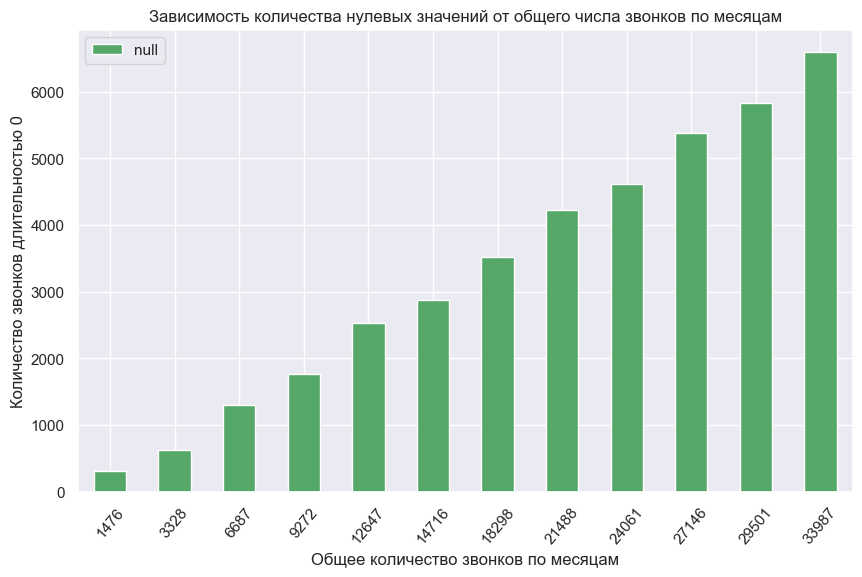

In [10]:
cal_nulls.plot(x='user_id', y='null',kind='bar',color='g',figsize=(10,6),rot=50)
plt.xlabel('Общее количество звонков по месяцам')
plt.ylabel('Количество звонков длительностью 0')
plt.title('Зависимость количества нулевых значений от общего числа звонков по месяцам')
plt.show()

Звонки с 0 продолжительностью появляються стабильно и пропорционально общему количеству звонков. Ничего аномального здесь не вижу, поэтому просто округлю секунды до минут.

In [11]:
cal['duration'] = np.ceil(cal['duration'])

In [12]:
cal.sample(3)

,id,call_date,duration,user_id,month,null
120658,1311_193,2018-09-27,8.0,1311,9,NaN
5725,1015_445,2018-11-17,1.0,1015,11,NaN
181765,1453_957,2018-09-16,0.0,1453,9,1.0


#### Интернет

Проверим тоже самое для интерета.

In [13]:
intr.query('mb_used == 0')['mb_used'].value_counts()[0]

19598

In [14]:
intr['month'] = intr['session_date'].dt.month

In [15]:
intr.loc[intr['mb_used'] == 0, 'null'] = 1

In [16]:
intr_nulls = intr.groupby('month')[['id','null']].agg('count')

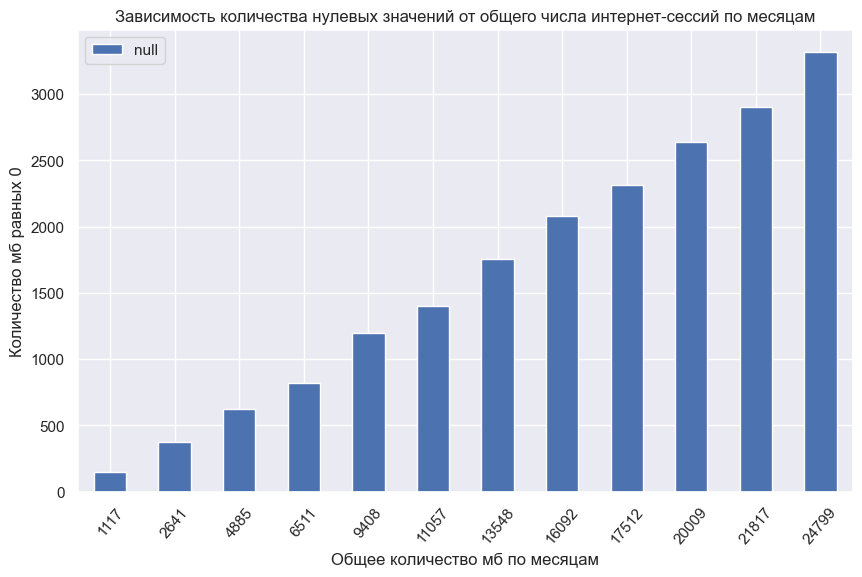

In [17]:
intr_nulls.plot(x='id', y='null',kind='bar',color='b',figsize=(10,6),rot=50)
plt.xlabel('Общее количество мб по месяцам')
plt.ylabel('Количество мб равных 0')
plt.title('Зависимость количества нулевых значений от общего числа интернет-сессий по месяцам')
plt.show()

Тут всё тоже самое, проблем не вижу. Но систематические 0, которых больше 10%, могут указывать на возможные неполадки, стоит указать на это в баг-репорте.

In [18]:
intr['gb_used'] = (intr['mb_used'] / 1024)

In [19]:
# Комментарий ревьюера 2
intr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Unnamed: 0    149396 non-null  int64         
 1   id            149396 non-null  object        
 2   mb_used       149396 non-null  float64       
 3   session_date  149396 non-null  datetime64[ns]
 4   user_id       149396 non-null  int64         
 5   month         149396 non-null  int64         
 6   null          19598 non-null   float64       
 7   gb_used       149396 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(1)
memory usage: 9.1+ MB


#### Сообщения

Так же дабавлю столбец с месяцами.

In [20]:
mes['month'] = pd.to_datetime(mes['message_date']).dt.month

#### Пользователи

In [21]:
us.isna().sum()

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

Вероятно эти польщователи продолжают пользоваться услугами Мегалайна. Поэтому заменю пропуски на 1 января 2019, так будет видно кто оставался клиентом по итогу 2019 года и можно будет делать рассчёты.

In [22]:
us['churn_date'].fillna('2019-01-01', inplace=True)

In [23]:
us['churn_date'] = pd.to_datetime(us['churn_date'], format='%Y-%m-%d')

## Обьединение таблиц и  Добавление новых стобцов

* Посчитать для каждого пользователя:
    * 1 количество сделанных звонков и израсходованных минут разговора по месяцам;
    * 2 количество отправленных сообщений по месяцам;
    * 3 объем израсходованного интернет-трафика по месяцам;
    * 4 помесячную выручку с каждого пользователя

Делаю сводные таблицы группируя по пользователям и месяцам, затем обьядению их в одну.

In [24]:
cal_g = cal.groupby(['user_id','month'])['duration'].agg(['count','sum']).reset_index()

In [25]:
intr_g = intr.groupby(['user_id','month'])['gb_used'].agg('sum').reset_index()

In [26]:
mes_g =  mes.groupby(['user_id','month'])['id'].agg('count').reset_index()

In [27]:
cal_g

,user_id,month,count,sum
0,1000,5,22,159.0
1,1000,6,43,172.0
2,1000,7,47,340.0
3,1000,8,52,408.0
4,1000,9,58,466.0
...,...,...,...,...
3169,1498,10,41,247.0
3170,1499,9,9,70.0
3171,1499,10,68,449.0
3172,1499,11,74,612.0


In [28]:
mes_g

,user_id,month,id
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


In [29]:
intr_g

,user_id,month,gb_used
0,1000,5,2.200674
1,1000,6,22.689229
2,1000,7,13.675430
3,1000,8,13.726494
4,1000,9,14.227451
...,...,...,...
3198,1498,10,20.097031
3199,1499,9,1.802490
3200,1499,10,17.371592
3201,1499,11,17.542295


In [30]:
# округляю ГБ в большую сторону
intr_g['gb_used'] = np.ceil(intr_g['gb_used'])

In [31]:
cal_intr = cal_g.merge(intr_g, on=['user_id', 'month'], how='outer')

In [32]:
# создаю df в котором обьединяю три сводные таблицы.
df = cal_intr.merge(mes_g, on=['user_id', 'month'], how='outer')

In [33]:
df.tail(50)

,user_id,month,count,sum,gb_used,id
3164,1497,11,64.0,371.0,14.0,14.0
3165,1497,12,71.0,545.0,20.0,17.0
3166,1498,7,23.0,175.0,8.0,20.0
3167,1498,8,57.0,400.0,24.0,62.0
3168,1498,9,59.0,471.0,22.0,44.0
3169,1498,10,41.0,247.0,21.0,42.0
3170,1499,9,9.0,70.0,2.0,11.0
3171,1499,10,68.0,449.0,18.0,48.0
3172,1499,11,74.0,612.0,18.0,59.0
3173,1499,12,69.0,492.0,13.0,66.0


In [34]:
df.user_id.unique().shape

(498,)

Есть несколько пользователей, которые вероятно не пользовались звонками и вероятно брали тариф только для интернета и сообщений. Так же есть два пользователя, которые не пользовались никакой услугой, их попросту нет в этих трёх изначальныхх таблицах. Возможно это совсем новые клиенты, которые пришли в канун нового года? В любом случае данных по ним нет, поэтому добавлять их в общую таблицу с значением 0 не буду, эчтобы не искажать картину.

In [35]:
# создаю сгруппированный дф и переменую в нём столбцы.
df_g = df.pivot_table(index=['user_id', 'month']).reset_index()

In [36]:
df_g

,user_id,month,count,gb_used,id,sum
0,1000,5,22.0,3.0,22.0,159.0
1,1000,6,43.0,23.0,60.0,172.0
2,1000,7,47.0,14.0,75.0,340.0
3,1000,8,52.0,14.0,81.0,408.0
4,1000,9,58.0,15.0,57.0,466.0
...,...,...,...,...,...,...
3209,1498,10,41.0,21.0,42.0,247.0
3210,1499,9,9.0,2.0,11.0,70.0
3211,1499,10,68.0,18.0,48.0,449.0
3212,1499,11,74.0,18.0,59.0,612.0


In [37]:
df_g.columns = ['user_id', 'month', 'calls', 'gb_used', 'messages', 'sum_calls_duration']

In [38]:
df_g.isna().sum()

user_id                 0
month                   0
calls                  40
gb_used                11
messages              497
sum_calls_duration     40
dtype: int64

In [39]:
df_g

,user_id,month,calls,gb_used,messages,sum_calls_duration
0,1000,5,22.0,3.0,22.0,159.0
1,1000,6,43.0,23.0,60.0,172.0
2,1000,7,47.0,14.0,75.0,340.0
3,1000,8,52.0,14.0,81.0,408.0
4,1000,9,58.0,15.0,57.0,466.0
...,...,...,...,...,...,...
3209,1498,10,41.0,21.0,42.0,247.0
3210,1499,9,9.0,2.0,11.0,70.0
3211,1499,10,68.0,18.0,48.0,449.0
3212,1499,11,74.0,18.0,59.0,612.0


In [40]:
# заменю пропуски  на нули
df_g.loc[df_g['messages'].isna(), 'messages'] = 0
df_g.loc[df_g['gb_used'].isna(), 'gb_used'] = 0
df_g.loc[df_g['sum_calls_duration'].isna(), 'sum_calls_duration'] = 0
df_g.loc[df_g['calls'].isna(), 'calls'] = 0

In [41]:
# добавляю данные пользователей
t_df = df_g.merge(us, on='user_id', how='inner').pivot_table(
    index=['user_id', 'first_name', 'last_name', 'age', 'city', 'tariff', 'reg_date', 'churn_date', 'month']).reset_index()

In [42]:
t_df

,user_id,first_name,last_name,age,city,tariff,reg_date,churn_date,month,calls,gb_used,messages,sum_calls_duration
0,1000,Рафаил,Верещагин,52,Краснодар,ultra,2018-05-25,2019-01-01,5,22.0,3.0,22.0,159.0
1,1000,Рафаил,Верещагин,52,Краснодар,ultra,2018-05-25,2019-01-01,6,43.0,23.0,60.0,172.0
2,1000,Рафаил,Верещагин,52,Краснодар,ultra,2018-05-25,2019-01-01,7,47.0,14.0,75.0,340.0
3,1000,Рафаил,Верещагин,52,Краснодар,ultra,2018-05-25,2019-01-01,8,52.0,14.0,81.0,408.0
4,1000,Рафаил,Верещагин,52,Краснодар,ultra,2018-05-25,2019-01-01,9,58.0,15.0,57.0,466.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1498,Всеволод,Акимчин,68,Владикавказ,smart,2018-07-19,2018-10-25,10,41.0,21.0,42.0,247.0
3210,1499,Гектор,Корнилов,35,Пермь,smart,2018-09-27,2019-01-01,9,9.0,2.0,11.0,70.0
3211,1499,Гектор,Корнилов,35,Пермь,smart,2018-09-27,2019-01-01,10,68.0,18.0,48.0,449.0
3212,1499,Гектор,Корнилов,35,Пермь,smart,2018-09-27,2019-01-01,11,74.0,18.0,59.0,612.0


In [43]:
# Комментарий ревьюера
t_df.user_id.unique().shape 

(498,)

In [44]:
#заменю тип количественных столбцов на int
t_df[['calls','gb_used','messages','sum_calls_duration']] = t_df[['calls','gb_used','messages','sum_calls_duration']].astype('Int64')

In [45]:
t_df.columns

Index(['user_id', 'first_name', 'last_name', 'age', 'city', 'tariff',
       'reg_date', 'churn_date', 'month', 'calls', 'gb_used', 'messages',
       'sum_calls_duration'],
      dtype='object')

In [46]:
t_df

,user_id,first_name,last_name,age,city,tariff,reg_date,churn_date,month,calls,gb_used,messages,sum_calls_duration
0,1000,Рафаил,Верещагин,52,Краснодар,ultra,2018-05-25,2019-01-01,5,22,3,22,159
1,1000,Рафаил,Верещагин,52,Краснодар,ultra,2018-05-25,2019-01-01,6,43,23,60,172
2,1000,Рафаил,Верещагин,52,Краснодар,ultra,2018-05-25,2019-01-01,7,47,14,75,340
3,1000,Рафаил,Верещагин,52,Краснодар,ultra,2018-05-25,2019-01-01,8,52,14,81,408
4,1000,Рафаил,Верещагин,52,Краснодар,ultra,2018-05-25,2019-01-01,9,58,15,57,466
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1498,Всеволод,Акимчин,68,Владикавказ,smart,2018-07-19,2018-10-25,10,41,21,42,247
3210,1499,Гектор,Корнилов,35,Пермь,smart,2018-09-27,2019-01-01,9,9,2,11,70
3211,1499,Гектор,Корнилов,35,Пермь,smart,2018-09-27,2019-01-01,10,68,18,48,449
3212,1499,Гектор,Корнилов,35,Пермь,smart,2018-09-27,2019-01-01,11,74,18,59,612


Теперь нужно посчитать выручку с каждого пользователя

In [47]:
tar['gb_per_month_included'] = np.ceil(tar['mb_per_month_included']/1024)

In [48]:
tar

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,gb_per_month_included
0,50,15360,500,550,200,3,3,smart,15.0
1,1000,30720,3000,1950,150,1,1,ultra,30.0


In [49]:
def rev(r):
    if r['tariff'] == 'smart':
        if r['messages'] > tar.loc[0, 'messages_included']:
            ex_mes = (r['messages']-tar.loc[0, 'messages_included'])*tar.loc[0, 'rub_per_message']
        else:
            ex_mes = 0
        if r['gb_used'] > tar.loc[0, 'gb_per_month_included']:
            ex_gb = (r['gb_used']-tar.loc[0, 'gb_per_month_included'])*tar.loc[0, 'rub_per_gb']
        else:
            ex_gb = 0
        if r['sum_calls_duration'] > tar.loc[0, 'minutes_included']:
            ex_dur = (r['sum_calls_duration']-tar.loc[0, 'minutes_included'])*tar.loc[0, 'rub_per_minute']
        else:
            ex_dur = 0
        revenue = ex_mes+ex_gb+ex_dur + tar.loc[0, 'rub_monthly_fee']
    else:
        if r['messages'] > tar.loc[1, 'messages_included']:
            ex_mes = (r['messages']-tar.loc[1, 'messages_included'])*tar.loc[1, 'rub_per_message']
        else:
            ex_mes = 0
        if r['gb_used'] > tar.loc[1, 'gb_per_month_included']:
            ex_gb = (r['gb_used']-tar.loc[1, 'gb_per_month_included'])*tar.loc[1, 'rub_per_gb']
        else:
            ex_gb = 0
        if r['sum_calls_duration'] > tar.loc[1, 'minutes_included']:
            ex_dur = (r['sum_calls_duration']-tar.loc[1, 'minutes_included'])*tar.loc[1, 'rub_per_minute']
        else:
            ex_dur = 0
        revenue = ex_mes+ex_gb+ex_dur+tar.loc[1, 'rub_monthly_fee']
    return revenue

In [50]:
t_df['revenue'] = t_df.apply(rev, axis=1)

In [51]:
t_df

,user_id,first_name,last_name,age,city,tariff,reg_date,churn_date,month,calls,gb_used,messages,sum_calls_duration,revenue
0,1000,Рафаил,Верещагин,52,Краснодар,ultra,2018-05-25,2019-01-01,5,22,3,22,159,1950.0
1,1000,Рафаил,Верещагин,52,Краснодар,ultra,2018-05-25,2019-01-01,6,43,23,60,172,1950.0
2,1000,Рафаил,Верещагин,52,Краснодар,ultra,2018-05-25,2019-01-01,7,47,14,75,340,1950.0
3,1000,Рафаил,Верещагин,52,Краснодар,ultra,2018-05-25,2019-01-01,8,52,14,81,408,1950.0
4,1000,Рафаил,Верещагин,52,Краснодар,ultra,2018-05-25,2019-01-01,9,58,15,57,466,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1498,Всеволод,Акимчин,68,Владикавказ,smart,2018-07-19,2018-10-25,10,41,21,42,247,1750.0
3210,1499,Гектор,Корнилов,35,Пермь,smart,2018-09-27,2019-01-01,9,9,2,11,70,550.0
3211,1499,Гектор,Корнилов,35,Пермь,smart,2018-09-27,2019-01-01,10,68,18,48,449,1150.0
3212,1499,Гектор,Корнилов,35,Пермь,smart,2018-09-27,2019-01-01,11,74,18,59,612,1513.0


И того мы добавили все нужные рассчёты и посчитали выручку с каждого пользователя по месяцам, теперь можно проводить исследование.

## Анализ данных

### Группировка данных

In [52]:
means = t_df.groupby(['user_id','tariff'])[['sum_calls_duration', 'messages', 'gb_used', 'revenue']].agg('mean').reset_index()

In [53]:
means

,user_id,tariff,sum_calls_duration,messages,gb_used,revenue
0,1000,ultra,320.75,62.0,13.625,1950.000000
1,1001,smart,422.0,0.0,16.0,850.000000
2,1002,smart,216.714286,10.0,16.714286,1035.714286
3,1003,ultra,764.4,76.0,11.8,1950.000000
4,1004,ultra,123.375,149.0,18.75,1950.000000
...,...,...,...,...,...,...
493,1495,ultra,784.0,68.0,25.4,2310.000000
494,1496,smart,498.666667,39.0,22.5,2362.583333
495,1497,smart,468.666667,17.0,15.333333,928.333333
496,1498,smart,323.25,42.0,18.75,1659.000000


In [54]:
means.sample(10)

,user_id,tariff,sum_calls_duration,messages,gb_used,revenue
250,1251,smart,434.090909,85.0,22.181818,2120.000000
418,1420,smart,180.75,11.0,23.75,2450.000000
208,1209,smart,312.0,74.0,19.428571,1507.714286
202,1203,ultra,512.1,28.0,8.9,1950.000000
435,1437,smart,267.0,14.0,21.4,1830.000000
299,1300,ultra,590.166667,154.0,31.833333,2800.000000
95,1095,smart,540.0,0.0,18.0,1270.000000
483,1485,ultra,584.0,155.0,23.0,1950.000000
379,1381,ultra,660.083333,41.0,25.166667,1975.000000
69,1069,smart,349.0,56.0,12.0,568.000000


In [55]:
# проверяю соответствуют-ли тарифы
t_df.query('user_id==[1003,1496]')

,user_id,first_name,last_name,age,city,tariff,reg_date,churn_date,month,calls,gb_used,messages,sum_calls_duration,revenue
17,1003,Белла,Белякова,23,Москва,ultra,2018-08-17,2019-01-01,8,55,9,37,380,1950.0
18,1003,Белла,Белякова,23,Москва,ultra,2018-08-17,2019-01-01,9,134,13,91,961,1950.0
19,1003,Белла,Белякова,23,Москва,ultra,2018-08-17,2019-01-01,10,108,15,83,855,1950.0
20,1003,Белла,Белякова,23,Москва,ultra,2018-08-17,2019-01-01,11,115,12,94,824,1950.0
21,1003,Белла,Белякова,23,Москва,ultra,2018-08-17,2019-01-01,12,108,10,75,802,1950.0
3191,1496,Трифон,Блохин,36,Вологда,smart,2018-01-27,2019-01-01,1,7,4,9,48,550.0
3192,1496,Трифон,Блохин,36,Вологда,smart,2018-01-27,2019-01-01,2,77,28,45,594,3432.0
3193,1496,Трифон,Блохин,36,Вологда,smart,2018-01-27,2019-01-01,3,79,25,46,557,2721.0
3194,1496,Трифон,Блохин,36,Вологда,smart,2018-01-27,2019-01-01,4,67,21,49,521,1813.0
3195,1496,Трифон,Блохин,36,Вологда,smart,2018-01-27,2019-01-01,5,63,24,40,484,2350.0


Всё в порядке, можно идти дальше.

### Медиана, дисперсия и стандартное отклонение

In [56]:
stat = means.pivot_table(index=['tariff'], values=['sum_calls_duration', 'gb_used', 'messages','revenue'], 
                    aggfunc={'sum_calls_duration': [np.mean, np.median, np.var, np.std], 
                             'gb_used': [np.mean,np.median, np.var, np.std], 
                             'messages': [np.mean,np.median, np.var, np.std],
                             'revenue': [np.mean,np.median, np.var, np.std]})

In [57]:
stat.T

tariff                             smart         ultra
gb_used            mean        16.308519     19.588446
                   median      16.333333        18.775
                   std          3.501643       8.11612
                   var         12.261503     65.871402
messages           mean        32.352078     54.030743
                   median          27.75          45.5
                   std         26.512448     46.366246
                   var         702.90991   2149.828793
revenue            mean      1324.401019   2086.464659
                   median    1177.116667        1950.0
                   std        606.040551     298.53272
                   var     367285.150014  89121.784981
sum_calls_duration mean       419.634803    527.821819
                   median       425.0625    514.541667
                   std        145.031543    281.786359
                   var      21034.148607   79403.55185

* Выручка в тарифе Smart:
  * Медиана - 1150 р., вдвое больше базовой стоимости тарифа.
  * Средняя выручка с пользователя - 1324.40 руб.
  * Стандартное отклонение так же очень высокое  - 606 руб.
  
* Выручка в тарифе Ultra:
  * Медиана - 1950, совпадает с базовой стоимостью тарифа.
  * Средняя выручка с пользователя - 2061.48 руб.
  * Стандартное отклонение небольшое - 299 руб.

In [58]:
plt.style.use('seaborn-deep')

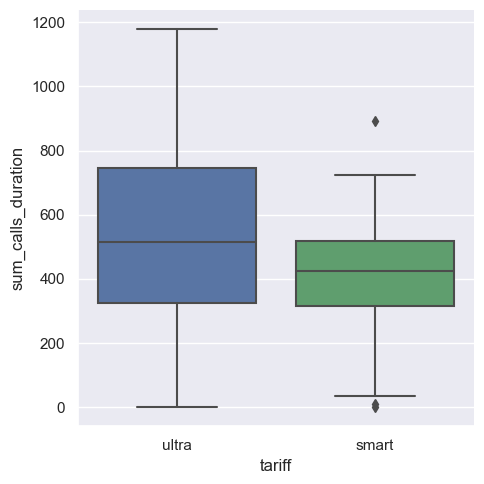

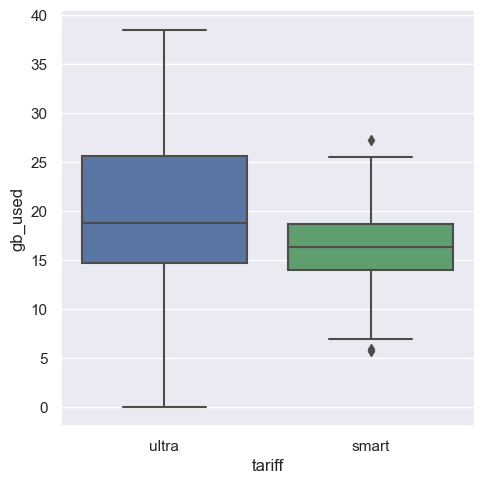

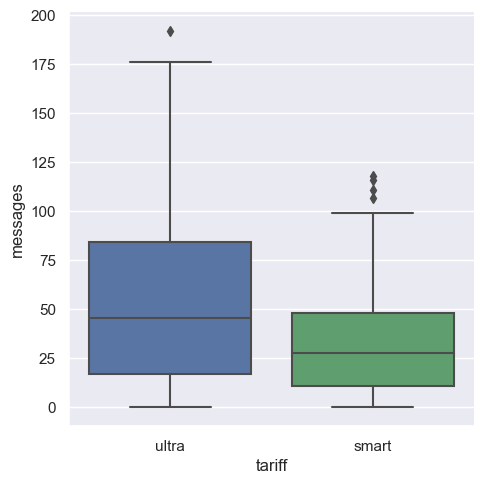

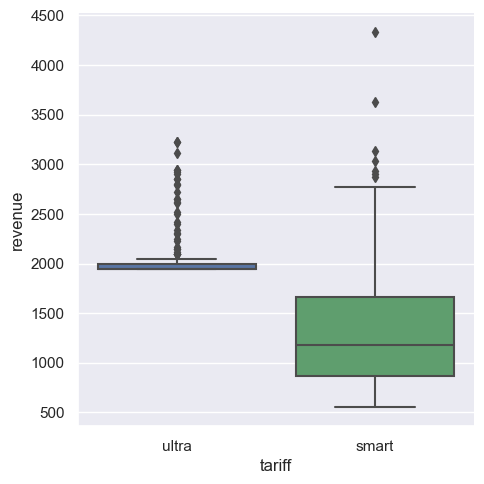

In [59]:
for column in ['sum_calls_duration', 'gb_used', 'messages','revenue']:    
    sns.catplot(x="tariff", y=column, kind="box", data=means, orient='v')

* Тариф ultra: 
- имеет большую дисперсию по показателям использованных сообщений, минут и трафика. Практически отсутствуют выбросы. Все медианы выше чем у smart. По выручке медиана равна нормальному значению, которое совпадает с базовой стоимостью тарифа.

* Тариф smart: 
- имеет меньшую дисперсию по показателям использованных сообщений, минут и трафика. Присутсвеют выбросы. Все медианы ниже чем у ultra. Нормальное значение от 550 до 1700 (верхняя планка практически достигает стоимости Ultra)


# Вывод:
Пользователи Ultra очень редко выходят за рамки своего базового тарифа. А пользователи Smart напротив очень и очень часто доплачивают за дополнительные услуги сверх тарифа.

In [60]:
def histplot(c):
    for tariff in ['ultra', 'smart']:
        sns.histplot(means.query('tariff == "ultra"')[c], kde=False, color='b',element="step", fill=False,alpha=0.7,bins=15)
        sns.histplot(means.query('tariff == "smart"')[c], kde=False, color ='g',element="step", fill=False,alpha=0.7,bins=15)
    _ = plt.legend(['ultra', 'smart'])
    _ = plt.ylabel('Количество пользователей')

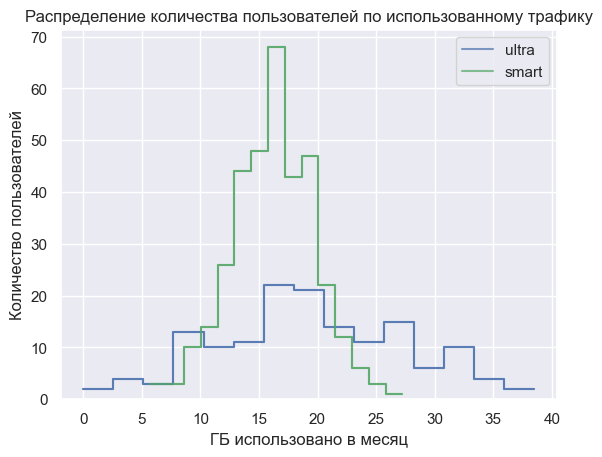

In [61]:
histplot('gb_used')
plt.title('Распределение количества пользователей по использованному трафику')
plt.xlabel('ГБ использовано в месяц')
plt.show()

Нормальное распределение у пользователей обох тарифов.

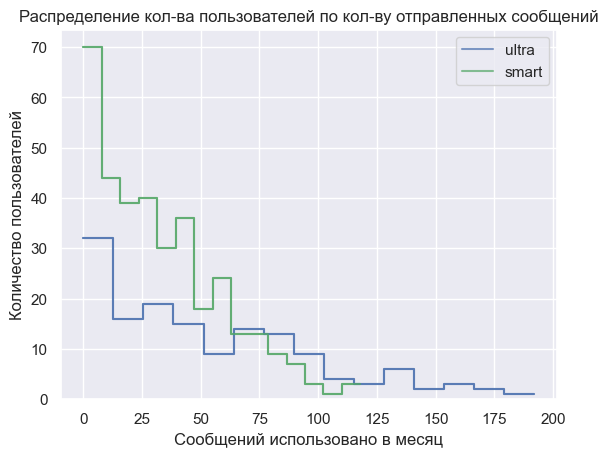

In [62]:
histplot('messages')
plt.title('Распределение кол-ва пользователей по кол-ву отправленных сообщений')
plt.xlabel('Сообщений использовано в месяц')
plt.show()

Распределение Пауссона

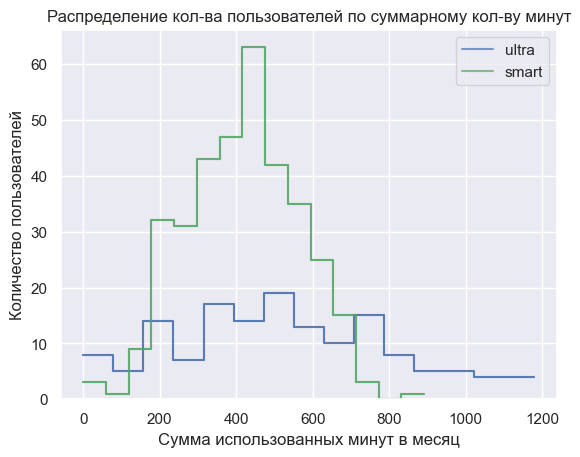

In [63]:
histplot('sum_calls_duration')
plt.title('Распределение кол-ва пользователей по суммарному кол-ву минут')
plt.xlabel('Сумма использованных минут в месяц')
plt.show()

Нормальное распределение

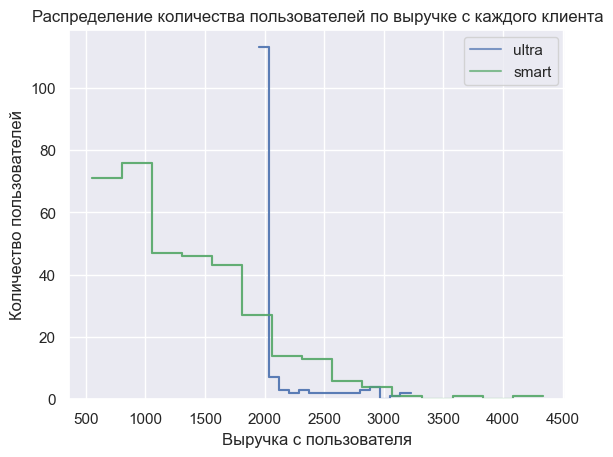

In [64]:
histplot('revenue')
plt.title('Распределение количества пользователей по выручке с каждого клиента')
plt.xlabel('Выручка с пользователя')
plt.show()

Распределение Пауссона с чётким сдвигом к стоимости тарифа

# Вывод:
* Распределение пользователей тарифа Ultra более плавное и разнообразное, при том что большинству хватает базового пакета.
* У Smart видно более чётко выраженную моду, на графике выручки видно, что многим клиентам не хватает базового пакета. 

Это может говорить о том, что пользователи тарифа Ultra чувствуют себя более спокойно и свободно, тариф позволяет им не беспокоятся о том что у них могут закончатся минуты и гигабайты. Поэтому они могут просто пользовататься услугами в своём ритме.

У пользователей тарифа smart поведение совершенно иное. Большинство пытается использовать тариф по максимуму, и как видно многим его не хватает, поэтому приходиться  доплачивать за доп.улуги.

## Проверка гипотез

### Гипотеза 1

Нулевая гипотеза  — средняя выручка пользователей тарифа «Ультра» равна средней выручке пользователей тарифа «Смарт».


Альтернативная гипотиза — средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.


Альфа - 0.05

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, правильно сформулированы гипотезы.</font>

In [65]:
alpha = 0.05
results = st.ttest_ind(t_df.query('tariff == "smart"')['revenue'], t_df.query('tariff == "ultra"')['revenue'], equal_var = False)
print('P-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

P-value: 4.2606313931076085e-250
Отвергаем нулевую гипотезу


P-value говорит о том, что вероятность того, что средние выручки пользователей обоих тарифов равны, ничтожно низкая. Поэтому отвергаем нулевую гипотезу и не-отвергаем альтернативную.

### Гипотеза 2

Нулевая гипотеза  — Средняя выручка от пользователей из Москвы и выручка пользователей из других регионов равны.


Альтернативная гипотиза — Средняя выручка от пользователей из Москвы отличается от выручки пользователей из других регионов


Альфа - 0.05

In [66]:
msc = t_df.query('city == "Москва"')
other = t_df.query('city != "Москва"')

In [67]:
alpha = 0.05
results = st.ttest_ind(msc['revenue'], other['revenue'], equal_var = False)
print('P-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

P-value: 0.5257376663729298
Не получилось отвергнуть нулевую гипотезу


In [68]:
msc.groupby('tariff')['revenue'].agg(['count','median','mean','sum'])

,count,median,mean,sum
tariff,,,,
smart,386,1007.5,1239.357513,478392.0
ultra,225,1950.0,2074.000000,466650.0


In [69]:
other.groupby('tariff')['revenue'].agg(['count','median','mean','sum'])

,count,median,mean,sum
tariff,,,,
smart,1843,1039.0,1300.574607,2396959.0
ultra,760,1950.0,2069.013158,1572450.0


И вправду, если посмотреть на медианы, то средняя выручка практически одинаковая.По тарифу Smart 1007 руб. и 1039, разница около 2%. А по тарифу ультра идентичная.

In [70]:
# средняя выручка тарифа Smart
s = t_df.query('tariff == "smart"')['revenue'].mean()

In [71]:
# средняя выручка тарифа Ultra
u = t_df.query('tariff == "ultra"')['revenue'].mean()

In [72]:
# Разница между тарифами
if u > s:
    r=u-s
elif s > u:
    r=s-u
else:
    r=0

In [73]:
print('Средняя выручка тарифа Smart:',s,'руб.')
print('Средняя выручка тарифа Ultra:',u,'руб.')

if u > s:
    print('Тариф Ultra приносит на',r,'руб. больше выручки')
elif s > u:
    print('Тариф Smart приносит на',r,'руб. больше выручки')
else:
    print('Тарифы приносят одинаковое количество выручки')

Средняя выручка тарифа Smart: 1289.9735307312696 руб.
Средняя выручка тарифа Ultra: 2070.1522842639592 руб.
Тариф Ultra приносит на 780.1787535326896 руб. больше выручки


Исследуем динамику средней выручки по тарифам на графике.

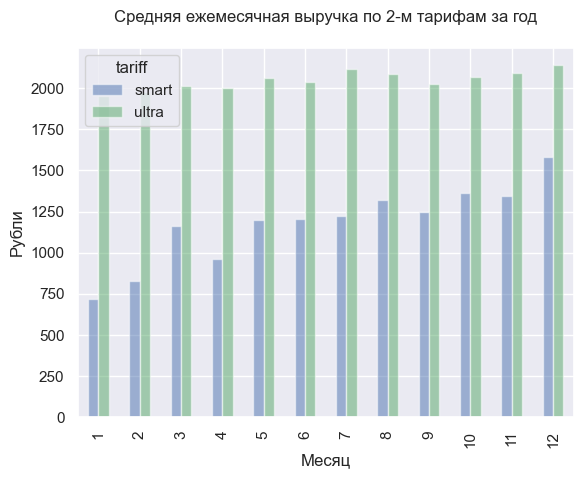

In [76]:
t_df.pivot_table(index='tariff', columns='month', values='revenue', aggfunc='mean').T.plot(kind='bar', alpha=0.5)
plt.title('Средняя ежемесячная выручка по 2-м тарифам за год'+ "\n")
plt.xlabel('Месяц')
plt.ylabel('Рубли')
plt.show()

Средняя выручка по тарифу смарт стремительно растет от месяца к месяцу, когда выручка от тарифа ульта стоит на месте.

## Общий вывод

**Проведя исследование, выяснилось, что поведение польователей тарифов Smart и Ultra кардинально отличаются друг от друга.**

* Пользователи тарифа Smart:
  * Средний пользователей платит 1150 руб., почти вдвое больше базового тарифа (550 руб.).
  * Судя по всему они пытаються использовать тариф по максимуму, и часто им его не хватает.
  * Средняя выручка 1290 руб. с клиента.
  * Средняя выручка по тарифу смарт стремительно растет от месяца к месяцу.
  * В данны представлено 351 клиентов тарифа Smart.
  
  
* Пользователи тарифа Ultra:
  * Практически никогда не берут доп. услуги.
  * Им хватает базового тарифа
  * Средний пользователь платит 1950 руб. (Соотвествует базовому тарифу)
  * Средняя выручка 2070 руб. с клиента
  * Средняя выручка по тарифу не растёт от месяца к месяцу.
  * В данны представлено 149 клиентов тарифа Smart.

***Выводы по проверке гипотез:***

**Средня выручка с каждого пользователя тарифа Ultra больше чем выручка с тарифа Smart  на 780.17 руб. (1289.97 руб против 2070.15 руб.)**


**Cредняя выручка от пользователей москвы не отличается от средней выручки в других населённых пунктах**